In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_iris

In [3]:
iris = load_iris()

In [4]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [5]:
x = iris.data
y = iris.target

In [6]:
x[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [7]:
y[:5]

array([0, 0, 0, 0, 0])

In [43]:
X = x[:,2:]

In [44]:
Y = y

In [45]:
len(X)

150

In [46]:
len(Y)

150

### 區分訓練資料 / 測試資料

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
x_train , x_test , y_train , y_test = train_test_split (X,Y,test_size = 0.2 , random_state = 0)

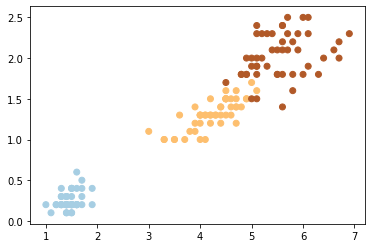

In [49]:
plt.scatter(X[:,0] , X[:,1]  ,c=Y , cmap = 'Paired')

### step1 開一台函數學習機

In [50]:
from sklearn.svm import SVC
clf = SVC(gamma = 'auto')

### Step2 訓練

In [51]:
clf.fit(x_train , y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

### step3 預測

In [52]:
y_predict = clf.predict(x_test)

In [53]:
y_predict

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0])

In [54]:
y_test

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0])

In [55]:
diff = y_predict - y_test

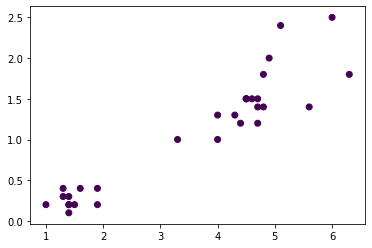

In [56]:
plt.scatter(x_test[:,0] , x_test[:,1] , c = diff)

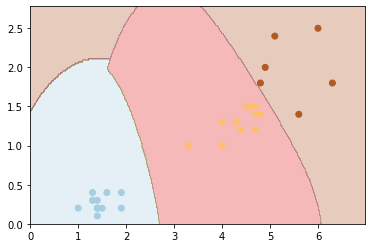

In [58]:
x0 = np.arange(0 , 7 , 0.02)
y0 = np.arange(0, 2.8 , 0.02)

xm , ym = np.meshgrid(x0,y0)
P = np.c_[xm.ravel() , ym.ravel()]
z = clf.predict(P)

Z = z.reshape(xm.shape)
plt.contourf(xm , ym , Z , cmap = 'Paired' , alpha = 0.3)

plt.scatter(x_test[:,0] , x_test[:,1]  , cmap = 'Paired' , c = y_test)